# Multicollinearity

In [17]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from dcor import distance_correlation


In [14]:

def pairwise_dcor(df):
    features = list(df.columns)
    combs = list(itertools.combinations(features, 2))
    combs = [n for n in combs if n[0] != n[1]] #remove diagonal
    df2 = pd.DataFrame(index=features, columns=features)
    correlations = []
    for i, pair in enumerate(combs):
        if i%500==0:
            print(i)
        feature0 = pair[0]
        feature1 = pair[1]
        x0 = df.loc[:,feature0]
        x1 = df.loc[:,feature1]
        c = distance_correlation(x0,x1)
        df2.loc[feature0, feature1] = c
        correlations.append([c, feature0, feature1])
                
    df2 = df2.fillna(0)
    df2 = df2 + df2.T - np.diag(np.diag(df2))
    df2 = df2.replace({0:1})
    return df2
    
    

In [7]:

# input_dir = './data/output/vfp_v7_indfact/'
# egemaps = pd.read_csv(input_dir+'egemaps_vector_both.csv', index_col=0)
# egemaps = egemaps.drop(['sid','token', 'target', 'filename'], axis=1)

# egemaps.head()


,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,38.72469,0.074773,37.18876,38.47970,40.44019,3.251423,37.94022,15.84932,206.4527,360.75950,...,-0.020086,-0.002822,0.131253,6.017192,2.325582,0.323750,0.279148,0.086250,0.056111,-36.04536
1,41.11026,0.121323,37.82011,40.29837,42.86220,5.042088,65.27183,67.44999,107.0295,136.12460,...,-0.030845,-0.001601,0.057944,3.724928,1.749271,0.271667,0.260411,0.276667,0.294430,-37.11591
2,40.64695,0.103110,38.43892,40.61772,43.04973,4.610809,70.18970,41.75834,143.7980,158.40300,...,-0.026844,-0.003204,0.118944,5.157593,3.498543,0.175000,0.168201,0.118889,0.079365,-36.20234
3,30.43643,0.271136,21.39732,35.07611,37.99580,16.598470,520.01150,754.83490,113.2329,72.07719,...,-0.035889,-0.006141,0.116599,3.724928,3.197675,0.174545,0.154176,0.116364,0.093738,-40.33198
4,32.12006,0.241961,22.38828,35.72247,37.69841,15.310130,1028.64100,954.45980,159.6470,112.48600,...,-0.046613,-0.006085,0.118889,5.730659,4.081633,0.121429,0.107628,0.120833,0.178814,-39.28465


In [105]:
# df2 = pairwise_dcor(egemaps)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [107]:
# df2.shape

(88, 88)

<Figure size 2160x2160 with 0 Axes>

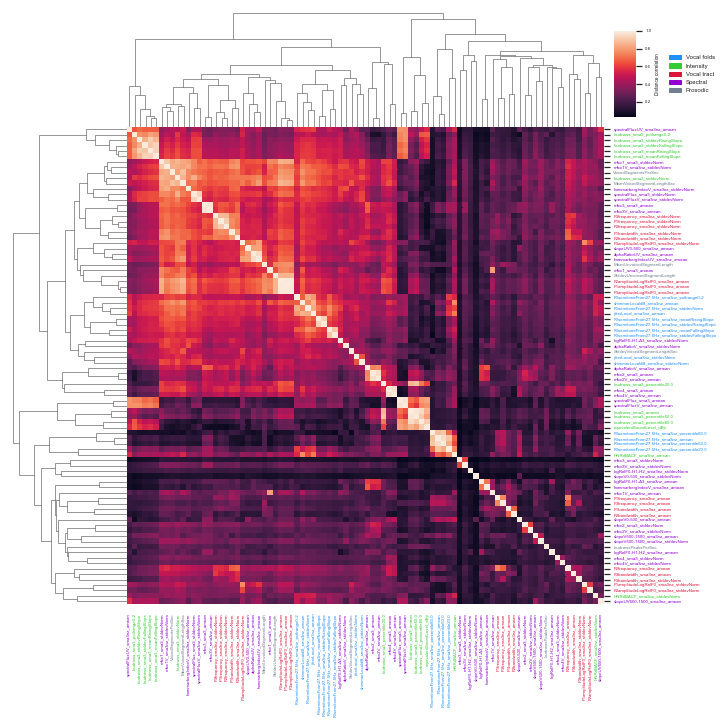

In [109]:
savefig = True
image_size = (30,30)
sns.set(font_scale = 0.4)

#right-left, up-down?, x, y
cbar_pos=(0.85, 0.84, 0.03, 0.12) #cbar_pos=(1, 0,0.05, 0.18) # cbar_pos=(0.02, 0.8, 0.05, 0.18)(0.02, 1, 0.05, 0.18)

plt.figure(figsize=image_size)
cg = sns.clustermap(df2, cbar_pos=cbar_pos,cbar_kws={'label': 'Distance correlation'})#, vmin=0, vmax=1)#, cmap = 'OrRd_r')

# plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
for xtick,ytick in zip(cg.ax_heatmap.yaxis.get_majorticklabels(),cg.ax_heatmap.xaxis.get_majorticklabels()):
    xtick_text = xtick.get_text()
    ytick_text = ytick.get_text()
    xtick_predefined_color = egemaps_category_dict.get(xtick_text)
    ytick_predefined_color = egemaps_category_dict.get(ytick_text)
    xtick.set_color(xtick_predefined_color)
    ytick.set_color(ytick_predefined_color)

leg = plt.legend(handles=[
    mpatches.Patch(color=vocal_folds, label='Vocal folds'),
    mpatches.Patch(color=intensity, label='Intensity'),
    mpatches.Patch(color=vocal_tract, label='Vocal tract'),
    mpatches.Patch(color=spectral, label='Spectral'),
    mpatches.Patch(color=prosodic, label='Prosodic'),
], loc ='upper left', bbox_to_anchor=(2.3,0.78), frameon=False, prop={'size': 6})

# plt.legend(frameon=False)
leg.get_frame().set_edgecolor('w')
leg.get_frame().set_linewidth(0.0)
    
if savefig:
    plt.savefig(input_dir+'outputs/clustermaps/'+'clustermap_dcor_both_coloredticks.png', dpi=300)


In [25]:
def dcor_clustermap(df, output_dir = './', group='both', data_type = 'both', savefig = True, color_code = True):
    
    image_size = (30,30)
    sns.set(font_scale = 0.4)

    #right-left, up-down?, x, y
    cbar_pos=(0.85, 0.84, 0.03, 0.12) #cbar_pos=(1, 0,0.05, 0.18) # cbar_pos=(0.02, 0.8, 0.05, 0.18)(0.02, 1, 0.05, 0.18)

    plt.figure(figsize=image_size)
    cg = sns.clustermap(df, cbar_pos=cbar_pos,cbar_kws={'label': 'Distance correlation'})#, vmin=0, vmax=1)#, cmap = 'OrRd_r')
    if color_code:
        # plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
        for xtick,ytick in zip(cg.ax_heatmap.yaxis.get_majorticklabels(),cg.ax_heatmap.xaxis.get_majorticklabels()):
            xtick_text = xtick.get_text()
            ytick_text = ytick.get_text()
            xtick_predefined_color = egemaps_category_dict.get(xtick_text)
            ytick_predefined_color = egemaps_category_dict.get(ytick_text)
            xtick.set_color(xtick_predefined_color)
            ytick.set_color(ytick_predefined_color)

        leg = plt.legend(handles=[
            mpatches.Patch(color=vocal_folds, label='Vocal folds'),
            mpatches.Patch(color=intensity, label='Intensity'),
            mpatches.Patch(color=vocal_tract, label='Vocal tract'),
            mpatches.Patch(color=spectral, label='Spectral'),
            mpatches.Patch(color=prosodic, label='Prosodic'),
        ], loc ='upper left', bbox_to_anchor=(2.3,0.78), frameon=False, prop={'size': 6})

        # plt.legend(frameon=False)
        leg.get_frame().set_edgecolor('w')
        leg.get_frame().set_linewidth(0.0)

    if savefig:
        plt.savefig(output_dir+f'clustermap_dcor_datatype-{data_type}_group-{group}_coloredticks.png', dpi=300)


In [21]:
# Color code ticklabels
vocal_folds = 'dodgerblue'
intensity = 'limegreen'
vocal_tract = 'crimson'
spectral = 'darkviolet'
prosodic = 'slategrey'

egemaps_category_dict = {
    'F0semitoneFrom27.5Hz_sma3nz_amean': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope': vocal_folds,
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope': vocal_folds, 
        'loudness_sma3_amean': intensity,
       'loudness_sma3_stddevNorm': intensity, 
        'loudness_sma3_percentile20.0': intensity,
       'loudness_sma3_percentile50.0': intensity, 
        'loudness_sma3_percentile80.0': intensity,
       'loudness_sma3_pctlrange0-2': intensity, 
        'loudness_sma3_meanRisingSlope': intensity,
       'loudness_sma3_stddevRisingSlope': intensity, 
        'loudness_sma3_meanFallingSlope': intensity,
       'loudness_sma3_stddevFallingSlope': intensity,
        'spectralFlux_sma3_amean': spectral,
       'spectralFlux_sma3_stddevNorm':spectral,
        'mfcc1_sma3_amean': spectral,
       'mfcc1_sma3_stddevNorm': spectral, 
    'mfcc2_sma3_amean': spectral, 
    'mfcc2_sma3_stddevNorm': spectral,
       'mfcc3_sma3_amean': spectral, 
    'mfcc3_sma3_stddevNorm': spectral, 
    'mfcc4_sma3_amean': spectral,
       'mfcc4_sma3_stddevNorm': spectral, 
    'jitterLocal_sma3nz_amean': vocal_folds,
       'jitterLocal_sma3nz_stddevNorm': vocal_folds, 
    'shimmerLocaldB_sma3nz_amean': vocal_folds,
       'shimmerLocaldB_sma3nz_stddevNorm': vocal_folds, 
        'HNRdBACF_sma3nz_amean': intensity,
       'HNRdBACF_sma3nz_stddevNorm': intensity,  
        'logRelF0-H1-H2_sma3nz_amean': spectral,
       'logRelF0-H1-H2_sma3nz_stddevNorm': spectral, 
        'logRelF0-H1-A3_sma3nz_amean': spectral,
       'logRelF0-H1-A3_sma3nz_stddevNorm': spectral, 
        'F1frequency_sma3nz_amean': vocal_tract,
       'F1frequency_sma3nz_stddevNorm': vocal_tract, 
        'F1bandwidth_sma3nz_amean': vocal_tract,
       'F1bandwidth_sma3nz_stddevNorm': vocal_tract, 
        'F1amplitudeLogRelF0_sma3nz_amean': vocal_tract,
       'F1amplitudeLogRelF0_sma3nz_stddevNorm': vocal_tract, 
        'F2frequency_sma3nz_amean': vocal_tract,
       'F2frequency_sma3nz_stddevNorm': vocal_tract, 
        'F2bandwidth_sma3nz_amean': vocal_tract,
       'F2bandwidth_sma3nz_stddevNorm': vocal_tract, 
        'F2amplitudeLogRelF0_sma3nz_amean': vocal_tract,
       'F2amplitudeLogRelF0_sma3nz_stddevNorm': vocal_tract, 
        'F3frequency_sma3nz_amean': vocal_tract,
       'F3frequency_sma3nz_stddevNorm': vocal_tract, 
        'F3bandwidth_sma3nz_amean': vocal_tract,
       'F3bandwidth_sma3nz_stddevNorm': vocal_tract, 
        'F3amplitudeLogRelF0_sma3nz_amean': vocal_tract,
       'F3amplitudeLogRelF0_sma3nz_stddevNorm': vocal_tract, 
        'alphaRatioV_sma3nz_amean': spectral,
       'alphaRatioV_sma3nz_stddevNorm': spectral, 
        'hammarbergIndexV_sma3nz_amean': spectral,
       'hammarbergIndexV_sma3nz_stddevNorm': spectral, 
        'slopeV0-500_sma3nz_amean': spectral,
       'slopeV0-500_sma3nz_stddevNorm': spectral, 
        'slopeV500-1500_sma3nz_amean': spectral,
       'slopeV500-1500_sma3nz_stddevNorm': spectral, 
        'spectralFluxV_sma3nz_amean': spectral,
       'spectralFluxV_sma3nz_stddevNorm': spectral, 
        'mfcc1V_sma3nz_amean': spectral,
       'mfcc1V_sma3nz_stddevNorm': spectral, 
        'mfcc2V_sma3nz_amean': spectral,
       'mfcc2V_sma3nz_stddevNorm': spectral, 
        'mfcc3V_sma3nz_amean': spectral,
       'mfcc3V_sma3nz_stddevNorm': spectral, 
        'mfcc4V_sma3nz_amean': spectral,
       'mfcc4V_sma3nz_stddevNorm': spectral, 
        'alphaRatioUV_sma3nz_amean': spectral,
       'hammarbergIndexUV_sma3nz_amean': spectral, 
        'slopeUV0-500_sma3nz_amean': spectral,
       'slopeUV500-1500_sma3nz_amean': spectral, 
        'spectralFluxUV_sma3nz_amean': spectral,
       'loudnessPeaksPerSec': prosodic, 
        'VoicedSegmentsPerSec': prosodic,
       'MeanVoicedSegmentLengthSec': prosodic, 
        'StddevVoicedSegmentLengthSec': prosodic,
       'MeanUnvoicedSegmentLength': prosodic, 
        'StddevUnvoicedSegmentLength': prosodic,
       'equivalentSoundLevel_dBp': intensity,
}

0
500
1000
1500
2000
2500
3000
3500
0
500
1000
1500
2000
2500
3000
3500
0
500
1000
1500
2000
2500
3000
3500


<Figure size 2160x2160 with 0 Axes>

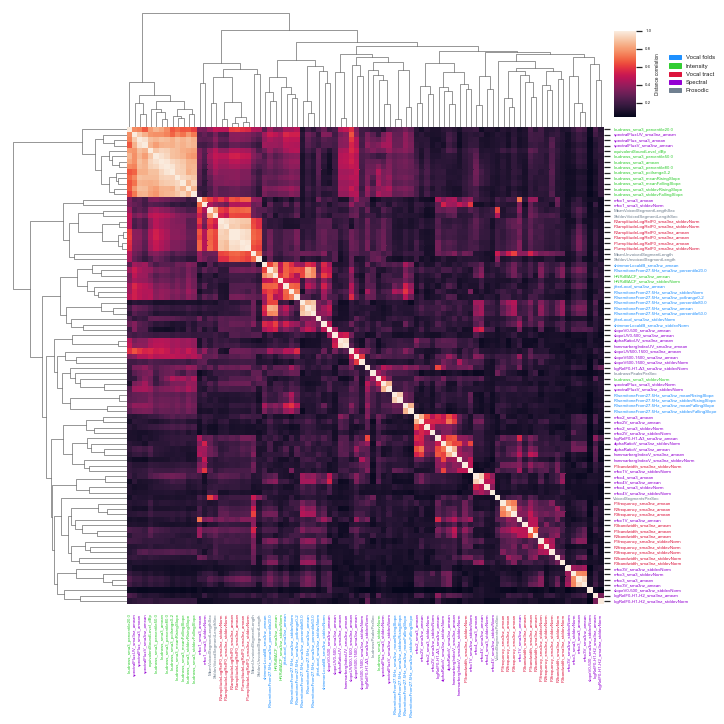

<Figure size 2160x2160 with 0 Axes>

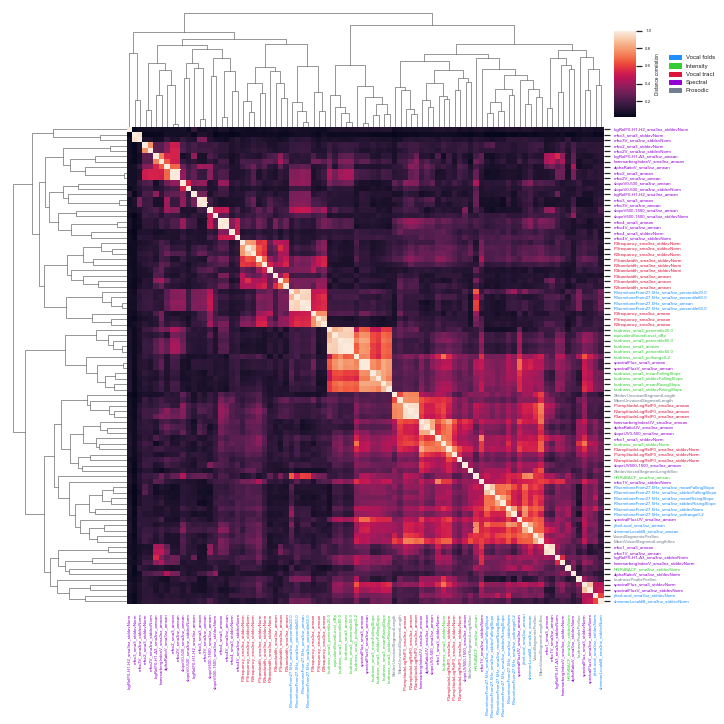

<Figure size 2160x2160 with 0 Axes>

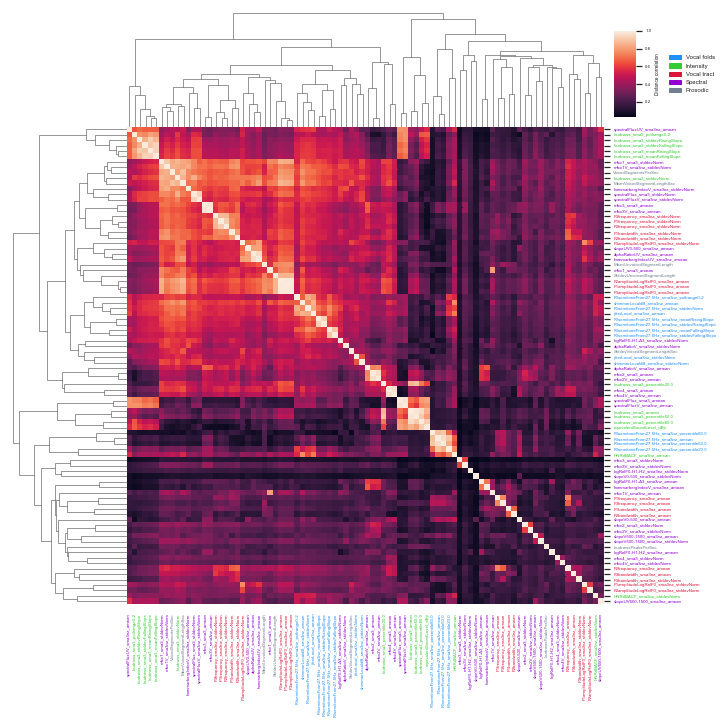

In [27]:
# Run all versions

input_dir = './data/output/vfp_v7_indfact/'
output_dir = input_dir+'outputs/clustermaps/'
for group in ['controls', 'patients', 'both']:
    for data_type in ['speech', 'vowel', 'both']:
        egemaps = pd.read_csv(input_dir+f'egemaps_vector_{data_type}.csv', index_col=0)
        if group == 'both':
            pass
        elif group == 'controls':
            egemaps = egemaps[egemaps.sid.str.contains('Norm')]
        elif group == 'patients':
            egemaps = egemaps[~egemaps.sid.str.contains('Norm')]
        egemaps = egemaps.drop(['sid','token', 'target', 'filename'], axis=1)
        df = pairwise_dcor(egemaps)
        dcor_clustermap(df, output_dir = output_dir, group=group, data_type = data_type, savefig = True, color_code = True)
